In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
samples_per_class = 5000
no_of_classes = 3
directory = "/content/gdrive/MyDrive/GW_SOP/Code/debugging/1D-CNN Multi-class/Signal_HIDDEN_in_strain_data/Signal_NOT_WHITENED/Test 6/data/"

In [4]:
noise_df = pd.read_csv(directory + "Final_Merged_Noise_Reduced_No_Abs.csv", header=None)
noise = noise_df.values.astype(float)

data_BBH_df = pd.read_csv(directory + "Final_BBH_Merged_Noise_Signal.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)


data_BNS_df = pd.read_csv(directory + "Final_BNS_Merged_Noise_Signal.csv", header=None)
data_BNS = data_BNS_df.values.astype(float)

In [5]:
X = np.concatenate((noise, data_BBH, data_BNS), axis=0)
print(X.shape)

(15000, 16384)


In [6]:
y = [int(i/samples_per_class) for i in range(samples_per_class*no_of_classes)]
y = tf.keras.utils.to_categorical(y)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [7]:
noise_df = None
data_BBH_df = None
data_BNS_df = None
noise = None
data_BBH = None
data_BNS = None

In [8]:
X *= 1e19
print(X)

# X *= 1e18
# print(X)

# X *= 1e17
# print(X)

[[ 10.0967559    0.56100488 -14.33332478 ...   3.65024835  -6.80468349
   -1.2230794 ]
 [ 13.5703948    2.73670314   5.13716903 ...   3.73636182   2.11860661
   11.95962345]
 [  4.60036313  -7.6890466   -4.15652743 ...   2.2452566  -19.18039608
    8.37687697]
 ...
 [ -3.13692053 -10.98723892   6.34641087 ...  -9.49925242   2.16307671
    9.36604751]
 [ 12.26392328   3.64449773   4.26997316 ...   5.95122168 -15.82681966
   -3.74686382]
 [ -7.76381547   9.54680483 -16.34790561 ...  -4.04401764  11.51300387
    1.68102185]]


In [9]:
X = np.expand_dims(X, axis=-1)
print(X.shape)

(15000, 16384, 1)


In [10]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=1)

In [11]:
print(X_train.shape, y_train.shape)

(14999, 16384, 1) (14999, 3)


In [12]:
model = Sequential()

model.add(Conv1D(16, 16, input_shape = (16384,1)))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(32, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(64, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(128, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
118/118 [==============================] - 16s 45ms/step - loss: 1.5040 - accuracy: 0.3640
Epoch 2/5
118/118 [==============================] - 5s 44ms/step - loss: 0.5673 - accuracy: 0.7144
Epoch 3/5
118/118 [==============================] - 5s 44ms/step - loss: 0.0821 - accuracy: 0.9743
Epoch 4/5
118/118 [==============================] - 5s 44ms/step - loss: 0.0226 - accuracy: 0.9933
Epoch 5/5
118/118 [==============================] - 5s 44ms/step - loss: 0.0058 - accuracy: 0.9982


In [14]:
X_train = None

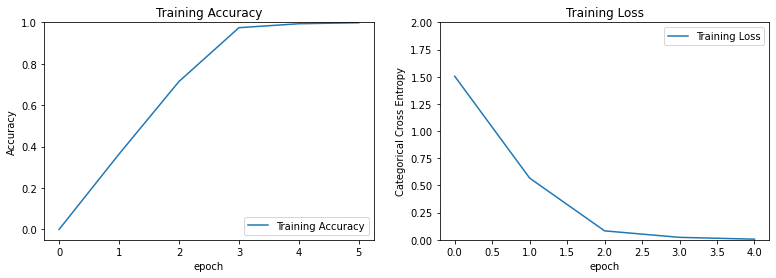

In [15]:
acc = [0.] + history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,2])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

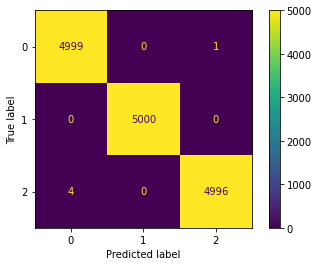

Precision: 1.000
Recall: 1.000
F1-Score: 1.000


In [16]:
pred = model.predict(X)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y, axis = 1)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot()
plt.show()

precision = np.diag(cm) / np.sum(cm, axis = 0)
precision = sum(precision)/3
print('Precision: %.3f' % precision)

recall = np.diag(cm) / np.sum(cm, axis = 1)
recall = sum(recall)/3
print('Recall: %.3f' % recall)

score = (2*precision*recall)/(precision + recall)
print('F1-Score: %.3f' % score)

In [18]:
# model.save(directory + "model_trial_1.h5")